# **Space X  Falcon 9 First Stage Landing Prediction**


## Data wrangling


In this lab, some Exploratory Data Analysis (EDA) will be performed in order to identify patterns within the data and determine the appropriate label for training supervised models.

Within the data set, several instances in which the booster did not land successfully are observed. In some cases, a landing was attempted but ultimately failed due to an accident. For example, the indicator <code>True Ocean</code> signifies that the mission outcome involved a successful landing in a specific region of the ocean, whereas <code>False Ocean</code> signifies an unsuccessful landing in the same region. Similarly, <code>True RTLS</code> indicates that the mission outcome involved a successful landing on a ground pad, while <code>False RTLS</code> indicates an unsuccessful landing on a ground pad. Likewise, <code>True ASDS</code> indicates that the mission outcome involved a successful landing on a drone ship, whereas <code>False ASDS</code> indicates an unsuccessful landing on a drone ship.

In this lab, these outcomes are primarily converted into training labels, where a value of `1` signifies that the booster landed successfully, and a value of `0` signifies that it did not.

The Falcon 9 first stage is expected to land successfully.


![](./images/landing_1.gif)



Several examples of an unsuccessful landing are shown here:


![](./images/crash.gif)

## Objectives

Exploratory data analysis was carried out, and training labels were determined.

* Exploratory data analysis was conducted.
* Training labels were established.



***


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import space_x
import pickle

from space_x.config import INTERIM_DATA_DIR, PROCESSED_DATA_DIR

pd.set_option('display.max_columns', None)    # Setting this option will print all collumns of a dataframe
pd.set_option('display.max_colwidth', None)   # Setting this option will print all of the data in a feature

## Data Analysis


### Merging data

Space X datasets, are downloaded from previous sections.


In [2]:
csv_file = os.path.join(INTERIM_DATA_DIR, 'spacex_web_scraped.csv')
df2 = pd.read_csv(csv_file)
print(len(df2))
display(df2.head())
df2.info()

121


,Flight_Number,Launch_Site,Payload,Payload_Mass,Orbit,Customer,Launch_Outcome,Booster_Version,Booster_Landing,Date,Time
0,1,CCAFS,Dragon Spacecraft Qualification Unit,0,LEO,SpaceX,Success,F9 v1.07B0003.18,Failure,4 June 2010,18:45
1,2,CCAFS,Dragon,0,LEO,NASA,Success,F9 v1.07B0004.18,Failure,8 December 2010,15:43
2,3,CCAFS,Dragon,525 kg,LEO,NASA,Success,F9 v1.07B0005.18,No attempt,22 May 2012,07:44
3,4,CCAFS,SpaceX CRS-1,"4,700 kg",LEO,NASA,Success,F9 v1.07B0006.18,No attempt,8 October 2012,00:35
4,5,CCAFS,SpaceX CRS-2,"4,877 kg",LEO,NASA,Success,F9 v1.07B0007.18,No attempt,1 March 2013,15:10


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Flight_Number    121 non-null    int64 
 1   Launch_Site      121 non-null    object
 2   Payload          121 non-null    object
 3   Payload_Mass     121 non-null    object
 4   Orbit            121 non-null    object
 5   Customer         120 non-null    object
 6   Launch_Outcome   121 non-null    object
 7   Booster_Version  121 non-null    object
 8   Booster_Landing  121 non-null    object
 9   Date             121 non-null    object
 10  Time             121 non-null    object
dtypes: int64(1), object(10)
memory usage: 10.5+ KB


In [3]:
pickle_file = os.path.join(INTERIM_DATA_DIR, 'dataset_part_1.pkl')
with open(pickle_file, 'rb') as file:
    df1 = pickle.load(file)
print(len(df1))
display(df1.head())
df1.info()

90


,Flight_Number,date_utc,Date,Time,Booster_Version,Payload_Mass,Orbit,Launch_Site,Mission_Outcome,Flights,GridFins,Reused,Legs,Customer,Landing_Pad,Block,Reused_Count,Serial,Longitude,Latitude
4,1,2010-06-04 18:45:00+00:00,2010-06-04,18:45:00,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,SpaceX,None,1.0,0,B0003,-80.577366,28.561857
5,2,2012-05-22 07:44:00+00:00,2012-05-22,07:44:00,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,NASA(COTS),None,1.0,0,B0005,-80.577366,28.561857
6,3,2013-03-01 19:10:00+00:00,2013-03-01,19:10:00,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,False,NASA (CRS),None,1.0,0,B0007,-80.577366,28.561857
7,4,2013-09-29 16:00:00+00:00,2013-09-29,16:00:00,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,MDA,None,1.0,0,B1003,-120.610829,34.632093
8,5,2013-12-03 22:41:00+00:00,2013-12-03,22:41:00,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,SES,None,1.0,0,B1004,-80.577366,28.561857


<class 'pandas.core.frame.DataFrame'>
Index: 90 entries, 4 to 93
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   Flight_Number    90 non-null     int64              
 1   date_utc         90 non-null     datetime64[ns, UTC]
 2   Date             90 non-null     object             
 3   Time             90 non-null     object             
 4   Booster_Version  90 non-null     object             
 5   Payload_Mass     90 non-null     float64            
 6   Orbit            90 non-null     object             
 7   Launch_Site      90 non-null     object             
 8   Mission_Outcome  90 non-null     object             
 9   Flights          90 non-null     int64              
 10  GridFins         90 non-null     bool               
 11  Reused           90 non-null     bool               
 12  Legs             90 non-null     bool               
 13  Customer         90 non-nul

Now both datasets will be merged

In [4]:
df1['Date'] = pd.to_datetime(df1['Date'])
df2['Date'] = pd.to_datetime(df2['Date'])

print(f'In the first Dataset there are {df1["Date"].duplicated().sum()} launches on the same day (duplicated values).')
print(f'In the second Dataset there are {df2["Date"].duplicated().sum()} launches on the same day (duplicated values).')


In the first Dataset there are 0 launches on the same day (duplicated values).
In the second Dataset there are 0 launches on the same day (duplicated values).


With no duplicated values the two datasets can be merged on the launch date **`'Date'`**

In [5]:
df = pd.merge(df1,df2, on = 'Date', how='right')
df = df[sorted(df.columns)]
df.sample(10)

,Block,Booster_Landing,Booster_Version_x,Booster_Version_y,Customer_x,Customer_y,Date,Flight_Number_x,Flight_Number_y,Flights,GridFins,Landing_Pad,Latitude,Launch_Outcome,Launch_Site_x,Launch_Site_y,Legs,Longitude,Mission_Outcome,Orbit_x,Orbit_y,Payload,Payload_Mass_x,Payload_Mass_y,Reused,Reused_Count,Serial,Time_x,Time_y,date_utc
47,3.0,Controlled,Falcon 9,F9 FTB1032.2245,GovSat,SES,2018-01-31,45.0,48,2.0,True,None,28.561857,Success,CCSFS SLC 40,CCAFS,True,-80.577366,True Ocean,GTO,GTO,GovSat-1,4230.000000,"4,230 kg",True,1.0,B1032,21:25:00,21:25,2018-01-31 21:25:00+00:00
78,5.0,No attempt,Falcon 9,F9 B5,NASA (CCtCap),NASA,2020-01-19,73.0,79,4.0,False,None,28.608058,Success,KSC LC 39A,KSC,False,-80.603956,None None,SO,Sub-orbital,Crew Dragon in-flight abort test,6123.547647,"12,050 kg",True,3.0,B1046,14:00:00,15:30,2020-01-19 14:00:00+00:00
29,3.0,Success,Falcon 9,F9 FT[,NASA (CRS),NASA,2017-02-19,27.0,30,1.0,True,5e9e3032383ecb267a34e7c7,28.608058,Success,KSC LC 39A,KSC,True,-80.603956,True RTLS,ISS,LEO,SpaceX CRS-10,2490.000000,"2,490 kg",False,1.0,B1031,14:39:00,14:39,2017-02-19 14:39:00+00:00
94,5.0,Success,Falcon 9,F9 B5B1051.6568,SpaceX,SpaceX,2020-10-18,88.0,95,6.0,True,5e9e3032383ecb6bb234e7ca,28.608058,Success,KSC LC 39A,KSC,True,-80.603956,True ASDS,VLEO,LEO,Starlink,15600.000000,"15,600 kg",True,12.0,B1051,12:25:00,12:25:57,2020-10-18 12:25:00+00:00
3,NaN,No attempt,NaN,F9 v1.07B0006.18,NaN,NASA,2012-10-08,NaN,4,NaN,NaN,NaN,NaN,Success,NaN,CCAFS,NaN,NaN,NaN,NaN,LEO,SpaceX CRS-1,NaN,"4,700 kg",NaN,NaN,NaN,NaN,00:35,NaT
115,NaN,Success,NaN,F9 B5B1049.9655,NaN,SpaceX,2021-05-04,NaN,116,NaN,NaN,NaN,NaN,Success,NaN,KSC,NaN,NaN,NaN,NaN,LEO,Starlink,NaN,"15,600 kg",NaN,NaN,NaN,NaN,19:01,NaT
36,3.0,Success,Falcon 9,F9 FT[,Iridium Communications,Iridium Communications,2017-06-25,34.0,37,1.0,True,5e9e3033383ecbb9e534e7cc,34.632093,Success,VAFB SLC 4E,VAFB,True,-120.610829,True ASDS,PO,LEO,Iridium NEXT,9600.000000,"9,600 kg",False,1.0,B1036,20:25:00,20:25,2017-06-25 20:25:00+00:00
4,1.0,No attempt,Falcon 9,F9 v1.07B0007.18,NASA (CRS),NASA,2013-03-01,3.0,5,1.0,False,None,28.561857,Success,CCSFS SLC 40,CCAFS,False,-80.577366,None None,ISS,LEO,SpaceX CRS-2,677.000000,"4,877 kg",False,0.0,B0007,19:10:00,15:10,2013-03-01 19:10:00+00:00
6,1.0,No attempt,Falcon 9,F9 v1.1,SES,SES,2013-12-03,5.0,7,1.0,False,None,28.561857,Success,CCSFS SLC 40,CCAFS,False,-80.577366,None None,GTO,GTO,SES-8,3170.000000,"3,170 kg",False,0.0,B1004,22:41:00,22:41,2013-12-03 22:41:00+00:00
80,5.0,Failure,Falcon 9,F9 B5,SpaceX,SpaceX,2020-02-17,75.0,81,4.0,True,5e9e3032383ecb6bb234e7ca,28.561857,Success,CCSFS SLC 40,CCAFS,True,-80.577366,False ASDS,VLEO,LEO,Starlink,15600.000000,"15,600 kg",True,3.0,B1056,15:05:55,15:05,2020-02-17 15:05:55+00:00


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   Block              89 non-null     float64            
 1   Booster_Landing    121 non-null    object             
 2   Booster_Version_x  89 non-null     object             
 3   Booster_Version_y  121 non-null    object             
 4   Customer_x         89 non-null     object             
 5   Customer_y         120 non-null    object             
 6   Date               121 non-null    datetime64[ns]     
 7   Flight_Number_x    89 non-null     float64            
 8   Flight_Number_y    121 non-null    int64              
 9   Flights            89 non-null     float64            
 10  GridFins           89 non-null     object             
 11  Landing_Pad        63 non-null     object             
 12  Latitude           89 non-null     float64        

In [7]:

df[[ 'Booster_Version_x', 'Booster_Version_y', 'Serial', 'Customer_x','Customer_y', 'Flight_Number_x', 'Flight_Number_y']].sample(10)


,Booster_Version_x,Booster_Version_y,Serial,Customer_x,Customer_y,Flight_Number_x,Flight_Number_y
33,Falcon 9,F9 FT[,B1034,Inmarsat,Inmarsat,31.0,34
82,Falcon 9,F9 B5,B1048,SpaceX,SpaceX,77.0,83
100,NaN,F9 B5 ♺[,NaN,NaN,NASA,NaN,101
42,Falcon 9,F9 FTB1031.2220,B1031,SES,SES S.A.,40.0,43
105,NaN,F9 B5B1058.5613,NaN,NaN,Various,NaN,106
47,Falcon 9,F9 FTB1032.2245,B1032,GovSat,SES,45.0,48
2,Falcon 9,F9 v1.07B0005.18,B0005,NASA(COTS),NASA,2.0,3
86,Falcon 9,F9 B5,B1059,SpaceX,SpaceX,81.0,87
77,Falcon 9,F9 B5,B1049,SpaceX,SpaceX,72.0,78
76,Falcon 9,F9 B5B1056.3482,B1056,SKY Perfect JSAT Corporation,Sky Perfect JSAT,71.0,77


In [8]:

df[['Launch_Site_x', 'Launch_Site_x', 'Orbit_x', 'Orbit_y','Payload_Mass_x','Payload_Mass_x','Time_x','Time_y']].sample(10)


,Launch_Site_x,Launch_Site_x,Orbit_x,Orbit_y,Payload_Mass_x,Payload_Mass_x,Time_x,Time_y
12,CCSFS SLC 40,CCSFS SLC 40,ISS,LEO,2216.000000,2216.000000,05:52:00,05:52
88,CCSFS SLC 40,CCSFS SLC 40,GEO,GTO,6123.547647,6123.547647,21:30:00,21:30
22,CCSFS SLC 40,CCSFS SLC 40,ISS,LEO,3136.000000,3136.000000,20:43:00,20:43
73,CCSFS SLC 40,CCSFS SLC 40,GTO,GTO,6500.000000,6500.000000,22:52:00,23:23
47,CCSFS SLC 40,CCSFS SLC 40,GTO,GTO,4230.000000,4230.000000,21:25:00,21:25
43,KSC LC 39A,KSC LC 39A,GTO,GTO,3700.000000,3700.000000,19:34:00,19:34
112,NaN,NaN,NaN,LEO,NaN,NaN,NaN,16:34
87,CCSFS SLC 40,CCSFS SLC 40,MEO,MEO,3880.000000,3880.000000,19:55:00,20:10:46
36,VAFB SLC 4E,VAFB SLC 4E,PO,LEO,9600.000000,9600.000000,20:25:00,20:25
6,CCSFS SLC 40,CCSFS SLC 40,GTO,GTO,3170.000000,3170.000000,22:41:00,22:41


In [9]:
columns_to_merge = ['Booster_Version', 'Customer', 'Orbit', 'Payload_Mass']

for col in columns_to_merge:
    df[col] = df[f"{col}_x"].combine_first(df[f"{col}_y"])  # Use _x if not NaN, otherwise _y
    df.drop([f"{col}_x", f"{col}_y"], axis=1, inplace=True)  # Drop redundant columns


In [10]:
# Convert to datetime and extract time as a string
df['Time_x'] = pd.to_datetime(df['Time_x'], errors='coerce').dt.strftime('%H:%M:%S')
df['Time_y'] = pd.to_datetime(df['Time_y'], errors='coerce').dt.strftime('%H:%M:%S')

# Merge: Use 'Time_x' where available, otherwise take 'Time_y'
df['Time (UTC)'] = df['Time_x'].combine_first(df['Time_y'])

C:\Users\josue\AppData\Local\Temp\ipykernel_6028\2108905553.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time_y'] = pd.to_datetime(df['Time_y'], errors='coerce').dt.strftime('%H:%M:%S')


In [13]:
df[['Time (UTC)','Time_x','Time_y']].sample(20)

,Time (UTC),Time_x,Time_y
30,06:00:00,NaN,06:00:00
63,18:34:05,NaN,18:34:05
64,18:16:00,NaN,18:16:00
87,20:10:46,NaN,20:10:46
77,02:19:21,NaN,02:19:21
55,04:45:00,NaN,04:45:00
11,05:00:00,NaN,05:00:00
104,13:02:00,NaN,13:02:00
72,22:01:00,NaN,22:01:00
32,11:15:00,NaN,11:15:00


In [ ]:
# Drop redundant columns
df.drop(['Time_x', 'Time_y'], axis=1, inplace=True)

In [12]:
# Combine 'Launch_Site_x' and 'Launch_Site_y' into one column.
df['Launch_Site'] = df['Launch_Site_x'].where(df['Launch_Site_x'].notna(), df['Launch_Site_y'])

# Drop the now redundant columns as they are no longer needed.
df.drop(['Launch_Site_x', 'Launch_Site_y'], axis=1, inplace=True)

# Define a mapping dictionary to standardise the launch site names.
# This converts various designations to a consistent format.
mapping = {
    'CCAFS': 'CCSFS SLC 40',         
    'Cape Canaveral': 'CCSFS SLC 40',  
    'CCSFS': 'CCSFS SLC 40',           
    'VAFB': 'VAFB SLC 4E',             
    'KSC': 'KSC LC 39A'                
}

# Apply the mapping to update values in the 'Launch_Site' column.
df['Launch_Site'] = df['Launch_Site'].replace(mapping)

# Use a regular expression to replace the second space with a hyphen.
df['Launch_Site'] = df['Launch_Site'].str.replace(r'^(\S+ \S+) (\S+)$', r'\1-\2', regex=True)

# Split the formatted 'Launch_Site' into two new columns: 'Facility' and 'Complex'.
df[['Facility', 'Complex']] = df['Launch_Site'].str.split(' ', expand=True)


In [13]:
df['Flight_Number'] = df['Flight_Number_y']
df.drop(['Flight_Number_x','Flight_Number_y'],axis=1, inplace=True)

The percentage of missing values in each attribute was identified and calculated.


In [14]:
df.isnull().sum()/df.count()*100

Block              35.955056
Booster_Landing     0.000000
Date                0.000000
Flights            35.955056
GridFins           35.955056
Landing_Pad        92.063492
Latitude           35.955056
Launch_Outcome      0.000000
Legs               35.955056
Longitude          35.955056
Mission_Outcome    35.955056
Payload             0.000000
Reused             35.955056
Reused_Count       35.955056
Serial             35.955056
date_utc           35.955056
Booster_Version     0.000000
Customer            0.000000
Orbit               0.000000
Payload_Mass        0.000000
Time (UTC)               inf
Launch_Site         0.000000
Facility            0.000000
Complex             0.000000
Flight_Number       0.000000
dtype: float64

Identify which columns are numerical and categorical:


### TASK 1: Calculation of the number of launches on each site

The dataset comprises several SpaceX launch facilities, including:
- <a href='https://en.wikipedia.org/wiki/List_of_Cape_Canaveral_and_Merritt_Island_launch_sites?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01'>**Cape Canaveral Space**</a> (CCSC), Launch Complex 40 (LC-40), **CCSC LC-40**
- **Vandenberg Air Force Base Space** (VAFB), Launch Complex 4E (SLC-4E), <b>VAFB SLC-4E </b> 
- **Kennedy Space Center** (KSC), Launch Complex 39A (LC-39A), <b>KSC LC-39A </b>.

The location of each launch is recorded in the `Launch_Site` column.


Subsequently, the number of launches for each site shall be determined.

The method <code>value_counts()</code> is to be utilised on the <code>LaunchSite</code> column, thereby ascertaining the number of launches per site:



In [15]:
# Apply value_counts() on column Launch_Site
df['Launch_Site'].value_counts()

Launch_Site
CCSFS SLC-40    72
KSC LC-39A      33
VAFB SLC-4E     16
Name: count, dtype: int64

Each launch aims to an dedicated orbit, and here are some common orbit types:


### TASK 2: Calculation of the number and occurrence of each orbit


*   <b>LEO</b>: Low Earth orbit (LEO)is an Earth-centred orbit with an altitude of 2,000 km (1,200 mi) or less (approximately one-third of the radius of Earth),\[1] or with at least 11.25 periods per day (an orbital period of 128 minutes or less) and an eccentricity less than 0.25.\[2] Most of the manmade objects in outer space are in LEO <a href='https://en.wikipedia.org/wiki/Low_Earth_orbit?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01'>\[1]</a>.

*   <b>VLEO</b>: Very Low Earth Orbits (VLEO) can be defined as the orbits with a mean altitude below 450 km. Operating in these orbits can provide a number of benefits to Earth observation spacecraft as the spacecraft operates closer to the observation<a href='https://www.researchgate.net/publication/271499606_Very_Low_Earth_Orbit_mission_concepts_for_Earth_Observation_Benefits_and_challenges?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01'>\[2]</a>.

*   <b>GTO</b> A geosynchronous orbit is a high Earth orbit that allows satellites to match Earth's rotation. Located at 22,236 miles (35,786 kilometers) above Earth's equator, this position is a valuable spot for monitoring weather, communications and surveillance. Because the satellite orbits at the same speed that the Earth is turning, the satellite seems to stay in place over a single longitude, though it may drift north to south,” NASA wrote on its Earth Observatory website <a  href="https://www.space.com/29222-geosynchronous-orbit.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01" >\[3] </a>.

*   <b>SSO (or SO)</b>: It is a Sun-synchronous orbit  also called a heliosynchronous orbit is a nearly polar orbit around a planet, in which the satellite passes over any given point of the planet's surface at the same local mean solar time <a href="https://en.wikipedia.org/wiki/Sun-synchronous_orbit?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01">\[4] <a>.

*   <b>ES-L1 </b>:At the Lagrange points the gravitational forces of the two large bodies cancel out in such a way that a small object placed in orbit there is in equilibrium relative to the center of mass of the large bodies. L1 is one such point between the sun and the earth <a href="https://en.wikipedia.org/wiki/Lagrange_point?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01#L1_point">\[5]</a> .

*   <b>HEO</b> A highly elliptical orbit, is an elliptic orbit with high eccentricity, usually referring to one around Earth <a href="https://en.wikipedia.org/wiki/Highly_elliptical_orbit?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01">\[6]</a>.

*   <b> ISS </b> A modular space station (habitable artificial satellite) in low Earth orbit. It is a multinational collaborative project between five participating space agencies: NASA (United States), Roscosmos (Russia), JAXA (Japan), ESA (Europe), and CSA (Canada)<a href="https://en.wikipedia.org/wiki/International_Space_Station?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01"> \[7] </a>

*   <b> MEO </b> Geocentric orbits ranging in altitude from 2,000 km (1,200 mi) to just below geosynchronous orbit at 35,786 kilometers (22,236 mi). Also known as an intermediate circular orbit. These are "most commonly at 20,200 kilometers (12,600 mi), or 20,650 kilometers (12,830 mi), with an orbital period of 12 hours <a href="https://en.wikipedia.org/wiki/List_of_orbits?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01"> \[8] </a>

*   <b> HEO </b> Geocentric orbits above the altitude of geosynchronous orbit (35,786 km or 22,236 mi) <a href="https://en.wikipedia.org/wiki/List_of_orbits?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01"> \[9] </a>

*   <b> GEO </b> It is a circular geosynchronous orbit 35,786 kilometres (22,236 miles) above Earth's equator and following the direction of Earth's rotation <a href="https://en.wikipedia.org/wiki/Geostationary_orbit?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01"> \[10] </a>

*   <b> PO </b> It is one type of satellites in which a satellite passes above or nearly above both poles of the body being orbited (usually a planet such as the Earth <a href="https://en.wikipedia.org/wiki/Polar_orbit?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01"> \[11] </a>

some are shown in the following plot:


![](./images/Orbits.png)


The method  <code>.value_counts()</code> was used to determine the number and occurrence of each orbit in the  column <code>Orbit</code>.


In [16]:
# Filter Orbit values
mapping = {
    'Polar': 'PO',         
    'SO': 'SSO'        
}
# Apply the mapping to update values in the 'Orbit' column.
df['Orbit'] = df['Orbit'].replace(mapping)

# Apply value_counts on Orbit column
display(df['Orbit'].value_counts())

Orbit
GTO      32
LEO      30
ISS      21
VLEO     14
PO       10
SSO       8
MEO       3
ES-L1     1
HEO       1
GEO       1
Name: count, dtype: int64

### TASK 3: Calculation of the number and occurence of mission outcome per orbit type


Occurence can be calculated per orbit type in the following:

In [17]:
df.value_counts(['Orbit','Mission_Outcome'],sort=False)

Orbit  Mission_Outcome
ES-L1  True Ocean          1
GEO    True ASDS           1
GTO    False ASDS          1
       None None          11
       True ASDS          13
       True Ocean          1
HEO    True ASDS           1
ISS    False ASDS          2
       False Ocean         1
       False RTLS          1
       None ASDS           1
       None None           3
       True ASDS           5
       True Ocean          1
       True RTLS           7
LEO    None None           2
       True Ocean          1
       True RTLS           4
MEO    None None           1
       True ASDS           2
PO     False ASDS          1
       False Ocean         1
       None None           1
       True ASDS           5
       True Ocean          1
SSO    None None           1
       True ASDS           2
       True RTLS           3
VLEO   False ASDS          2
       True ASDS          12
Name: count, dtype: int64

The method <code>.value_counts()</code> will be applied to the <code>Mission_Outcome</code> column to determine the number of <code>landing_outcomes</code>, and the result will then be assigned to the variable <code>landing_outcomes</code>.

In [18]:
# landing_outcomes = values on Outcome column
landing_outcomes = df['Mission_Outcome'].value_counts()
landing_outcomes

Mission_Outcome
True ASDS      41
None None      19
True RTLS      14
False ASDS      6
True Ocean      5
False Ocean     2
None ASDS       1
False RTLS      1
Name: count, dtype: int64

The following bullet points have been prepared to clarify the designations utilised in representing the outcomes of mission landings:

- **`True Ocean`** represents a mission outcome in which a successful landing was achieved in a designated region of the ocean.
- **`False Ocean`** represents a mission outcome in which the landing was unsuccessful.
- **`True RTLS`** represents a mission outcome in which a successful landing was accomplished on a ground pad.
- **`False RTLS`** represents a mission outcome in which the landing was unsuccessful.
- **`True ASDS`** represents a mission outcome in which a successful landing was accomplished on a drone ship.
- **`False ASDS`** represents a mission outcome in which the landing was unsuccessful.
- **`None ASDS`** and **`None None`** are utilised to denote a failure to land.



In [19]:
for i,outcome in enumerate(landing_outcomes.keys()):
    print(i,outcome)

0 True ASDS
1 None None
2 True RTLS
3 False ASDS
4 True Ocean
5 False Ocean
6 None ASDS
7 False RTLS


A set of outcomes where the second stage did not land successfully will be created:


In [20]:
bad_outcomes=set(landing_outcomes.keys()[[1,3,5,6,7]])
bad_outcomes

{'False ASDS', 'False Ocean', 'False RTLS', 'None ASDS', 'None None'}

### TASK 4: Creation of a landing outcome label from Outcome column


Using the <code>Outcome</code>,  a list will be created where the element is zero if the corresponding  row  in  <code>Outcome</code> is in the set <code>bad_outcome</code> ; otherwise, would be one. Subsequently, it will be assigned to the variable <code>landing_class</code>:


In [21]:
landing_class = []
length = len(df['Mission_Outcome'])

for i in range(length):
    outcome = df['Mission_Outcome'].iloc[i]
    
    if outcome in bad_outcomes:
        landing_class.append(0)
    elif pd.isna(outcome): 
        landing_class.append(0)
    else:
        landing_class.append(1)

This variable is utilised as the classification variable representing the outcome of each launch. A value of zero, indicates the  first stage did **not land successfully**; whereas a value of one means  the first stage landed **Successfully**.

In [22]:
df['Class']=landing_class

The following line of code is to determine  the success rate:


In [23]:
float(df["Class"].mean())

0.49586776859504134

The number and occurence of mission outcome per orbit type can be calculated in the following:

In [24]:
df.value_counts(['Orbit','Class','Booster_Landing'],sort=False)

Orbit  Class  Booster_Landing
ES-L1  1      Controlled          1
GEO    1      Success             1
GTO    0      Failure             2
              No attempt         12
              Success             4
       1      Controlled          1
              Success            13
HEO    1      Success             1
ISS    0      Failure             3
              No attempt          3
              Precluded           1
              Uncontrolled        1
       1      Controlled          1
              Success            12
LEO    0      Failure             3
              No attempt          2
              Success            20
       1      Controlled          1
              Success             4
MEO    0      No attempt          1
       1      Success             2
PO     0      Failure             1
              No attempt          2
              Uncontrolled        1
       1      Controlled          1
              Success             5
SSO    0      No attempt          

The dataset shall be exported to **CSV** and **Pickle** files for the subsequent sections.



### Task 5: Clean data

In [25]:
desired_sort = ['Date',    
                'Time (UTC)',  
                'Booster_Version',                
                'Serial',       
                'Launch_Site', 
                'Facility', 
                'Complex', 
                'Longitude',    
                'Latitude', 
                'Payload', 
                'Payload_Mass',
                'Customer', 
                'Orbit',     
                'Mission_Outcome', 
                'Launch_Outcome', 
                'Booster_Landing',  
                'Landing_Pad', 
                'Block', 
                'Flights', 
                'GridFins',       
                'Legs', 
                'Reused', 
                'Reused_Count', 
                'date_utc', 
                'Flight_Number',       
                'Class']
df=df[desired_sort]

In [26]:
# Clean the Payload_Mass column by removing unwanted substrings and whitespace.
df['Payload_Mass'] = pd.to_numeric(df['Payload_Mass'].astype('str').str.replace(r'[^\d.]', '', regex=True)).fillna(0).astype(float)


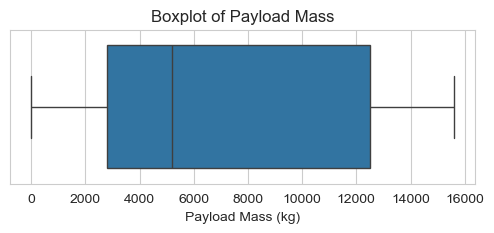

In [27]:

# Set style
sns.set_style("whitegrid")

# Create the boxplot using seaborn
plt.figure(figsize=(6, 2))
sns.boxplot(data=df, x='Payload_Mass')

# Labels and title
plt.xlabel("Payload Mass (kg)")
plt.title("Boxplot of Payload Mass")

# Show the plot
plt.show()


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   Date             121 non-null    datetime64[ns]     
 1   Time (UTC)       0 non-null      object             
 2   Booster_Version  121 non-null    object             
 3   Serial           89 non-null     object             
 4   Launch_Site      121 non-null    object             
 5   Facility         121 non-null    object             
 6   Complex          121 non-null    object             
 7   Longitude        89 non-null     float64            
 8   Latitude         89 non-null     float64            
 9   Payload          121 non-null    object             
 10  Payload_Mass     121 non-null    float64            
 11  Customer         121 non-null    object             
 12  Orbit            121 non-null    object             
 13  Mission_Outcome  89 

### Save the df in a CSV and a PKL

In [ ]:
# save as CSV file 
csv_file = os.path.join(INTERIM_DATA_DIR, "dataset_part_2.csv")
df.to_csv(csv_file, index=False)

# save as Pickle file
pickle_file= os.path.join(INTERIM_DATA_DIR, 'dataset_part_2.pkl')
df.to_pickle(pickle_file)

Copyright © 2021 IBM Corporation. All rights reserved.
